In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

In [39]:
df = pd.read_csv('../../data/occupancy.csv')

df = df[df['floor_id'] == 1658] # 1654 ASL-04
df = df.reset_index(drop=True)

df.to_csv('../../data/occupancy_1658.csv', index=False)

print(len(df))
df.head()

2091


,timestamp,count,room_id,room_name,room_popular_name,room_gross_area,room_net_area,room_type_id,room_type_name,floor_id,floor_name,floor_popular_name,building_id,building_name,building_popular_name
0,1723194444,5,108807,S206,Reference,910.55,898.83,44.0,Library,1658,ASL-02,NaN,216,ABDUS SALAM LIBRARY,ASL
1,1723194444,1,108849,201W4,Open Plan Office,91.69,91.36,102.0,Open Plan Office,1658,ASL-02,NaN,216,ABDUS SALAM LIBRARY,ASL
2,1723194444,1,108837,201W1,Open Plan Office,55.55,55.15,102.0,Open Plan Office,1658,ASL-02,NaN,216,ABDUS SALAM LIBRARY,ASL
3,1723194444,1,108834,S204,ICT Training Room,69.30,67.73,73.0,Training Room,1658,ASL-02,NaN,216,ABDUS SALAM LIBRARY,ASL
4,1723194444,1,108840,201,Walkway,259.44,249.68,1.0,Primary Circulation,1658,ASL-02,NaN,216,ABDUS SALAM LIBRARY,ASL


In [40]:
timestamps = []
counts = []

prev_timestamp = df['timestamp'][0]
current_count = 0
for i in range(0, len(df)):

    if df['timestamp'][i] != prev_timestamp:
        timestamps.append(prev_timestamp)
        counts.append(current_count)

        prev_timestamp = df['timestamp'][i]
        current_count = int(df['count'][i])

    current_count += int(df['count'][i])

print(len(timestamps))
print(len(counts))

282
282


In [42]:
# timestamps to readable format
timestamps = pd.to_datetime(timestamps, unit='s')

Text(0, 0.5, 'Occupancy')

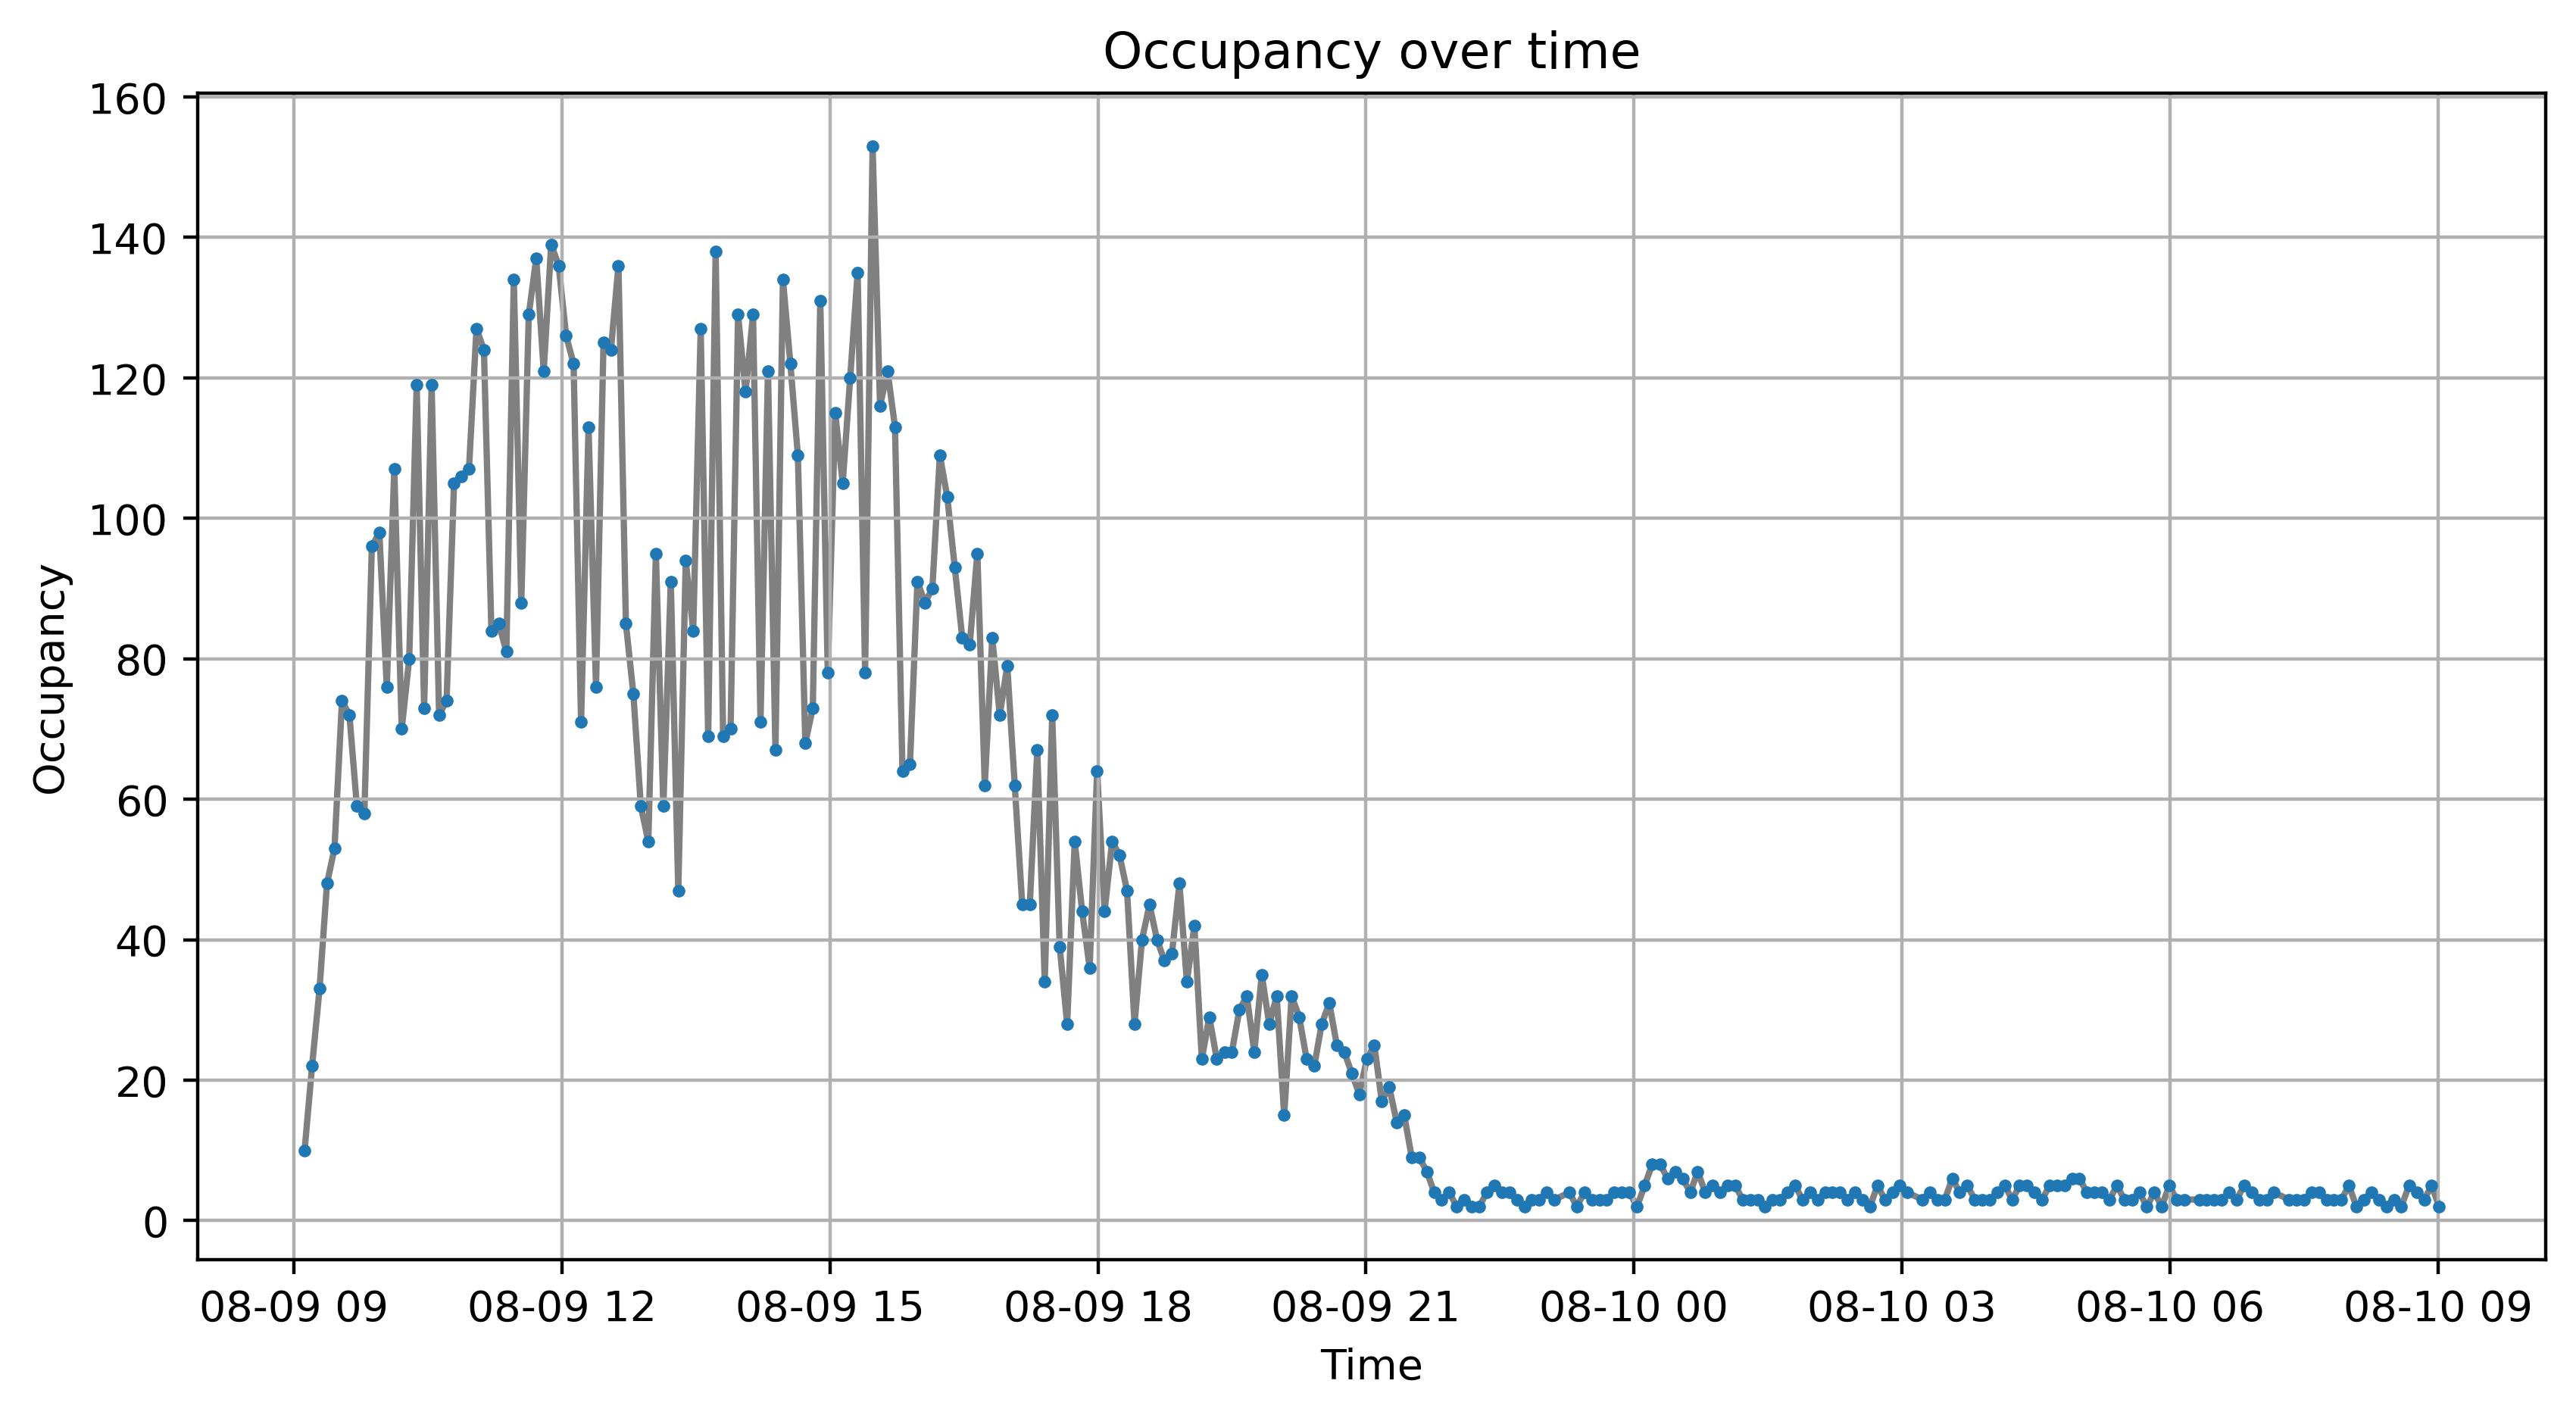

In [43]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(timestamps, counts, s=4, zorder=2)
ax.plot(timestamps, counts, zorder=1, color='gray')

ax.grid(True)
ax.set_title('Occupancy over time')
ax.set_xlabel('Time')
ax.set_ylabel('Occupancy')
